In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-19 03:14:54,040 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-19 03:14:54,041 - settings - Setting database.user to celiib
INFO - 2021-01-19 03:14:54,042 - settings - Setting database.password to newceliipass
INFO - 2021-01-19 03:14:54,081 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-19 03:14:54,083 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-19 03:14:54,099 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-19 03:14:54,351 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-19 03:14:54,386 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-19 03:14:54,387 - settings - Setting database.user to celiib
INFO - 2021-01-19 03:14:54,388 - settings - Setting database.password to newceliipass
INFO - 2021-01-19 03:14:54,390 - settings - Setting enable_python_native_blobs to True


Sleeping 88 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-19 03:14:54,655 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 7306


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,1,=BLOB=,11723,24809,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8309
864691134242673681,0,0.25,30.00,0,0,1,=BLOB=,10252,20204,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9755
864691134252908410,0,0.25,30.00,0,0,1,=BLOB=,10910,22764,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.2558
864691134316523453,0,0.25,30.00,0,0,1,=BLOB=,10031,22403,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5114
864691134384033872,0,0.25,30.00,0,0,1,=BLOB=,10015,20509,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8075
864691134391593458,0,0.25,30.00,0,0,1,=BLOB=,11947,25033,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7341
864691134409056935,0,0.25,30.00,0,0,1,=BLOB=,10770,22630,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9198
864691134428609977,0,0.25,30.00,0,0,1,=BLOB=,13062,28555,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.3236
864691134441691943,0,0.25,30.00,0,0,1,=BLOB=,10681,23432,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9167
864691134484023255,0,0.25,30.00,0,0,1,=BLOB=,21063,46992,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2306


In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition() & minnie.MultiSomaProofread2.proj()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,bd1627d7d13c83b53d92e08149722d3e,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,32396,53500,2021-01-18 21:14:16
__neuron_split_suggestions,dcd361f29ba0cff26aac4265a115c6c3,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,32459,53501,2021-01-18 21:14:32


INFO - 2021-01-19 03:14:54,816 - autopopulate - Found 49 keys to populate
INFO - 2021-01-19 03:14:54,827 - connection - Transaction started
INFO - 2021-01-19 03:14:54,829 - autopopulate - Populating: {'segment_id': 864691135065018692, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}


Populate Started


----- Working on Neuron 864691135065018692-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [1]
multi_touch_limbs = [ 0  1 13]


 -------- Working on limb 0------------
Starting combinations to process = [[25 26]]


---- working on disconnecting 25 and 26
---- This disconnects S1_0 from S1_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [25, 26]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [24]
Short segments to combine = []
Found 0 high degree coordinates to cut
Skipping endnode 26 because skeletal distance was 1008.9552125778177 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [25 26]: curr_angle = 66.38

Total time for doubling_back = 0.03142976760864258

Attempting the width jump check (attempting from both sides)
  Edge: [25 26]: jump = -449.69
Total time for width = 0.008561134338378906
Path starting at 25 had err_edges: []
  Edge: [26 25]: jump = 660.86
Adding error edge [26 25] because width jump was 660.8626974310755
Total time for width = 0.008001327514648438
Path starting at 26 had err_edges: [[26, 25]]
first_error_sizes = [-inf, 660.8626974310755], winning_path = 1
***inside resolve crossover!!!!****
coordinate_branches = [24, 25, 26]
24 = red
25 = aqua
26 = purple
Angle between 24 and 25 = 50.52 
Angle between 24 and 26 = 75.92 
Angle between 25 and 26 = 69.14 
Final Matches = []
matched_branches_revised = []
Original graph


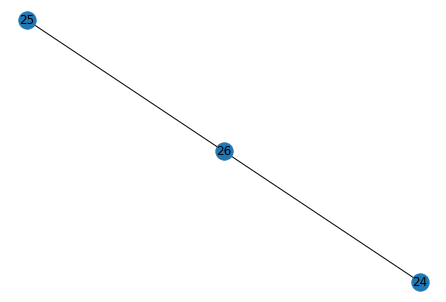

match_branches = []
edges_to_delete (resolve crossover) = [[24, 25], [24, 26], [25, 26]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([24, 25]), array([24, 26]), array([25, 26])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {25}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
Comp 2 = {26}
curr_limb_copy.deleted_edges = [array([24, 25]), array([24, 26]), array([25, 26])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([24, 25]), array([24, 26]), array([25, 26])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([25]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 

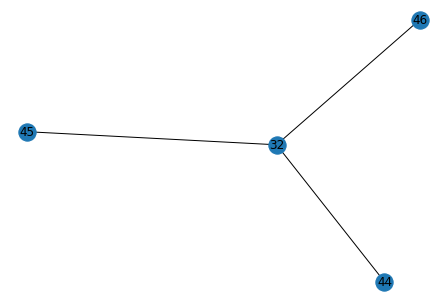

match_branches = [[44, 45]]
edges_to_delete (resolve crossover) = [[32, 44], [32, 45], [32, 46], [44, 46], [45, 46]]
edges_to_create (resolve crossover) = [[44, 45]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 31 because skeletal distance was 945.1692096964357 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[32, 44], [32, 45], [32, 46], [44, 46], [45, 46]]
edges_to_create = [[44, 45]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Comp 1 = {32, 19, 31}
Comp 2 = {46}
curr_limb_copy.deleted_edges = [[32, 44], [32, 45], [32, 46], [44, 46], [45, 46]]
curr_limb_copy.created_edges = [[44, 45]]
After get best cut: cut_edges = [[32, 44], [32, 45], [32, 46], [44, 46], [45, 46]], added_edges = [[44, 45]]
total_soma_paths_to_cut = []
-----------counte

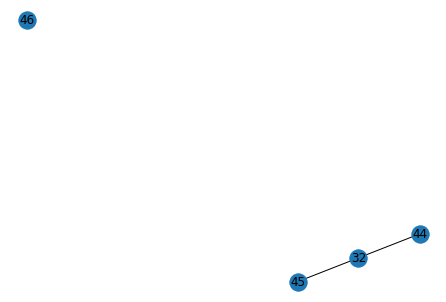

match_branches = [[44, 45]]
edges_to_delete (resolve crossover) = [[32, 44], [32, 45], [32, 46], [44, 46], [45, 46]]
edges_to_create (resolve crossover) = [[44, 45]]
curr_limb.deleted_edges 5 =[[32, 44], [32, 45], [32, 46], [44, 46], [45, 46]]
Skipping endnode 42 because skeletal distance was 2282.070413000366 and threshold was 2500
skip_nodes = [42]
edges_to_delete (cut_limb_network) = [[32, 44], [32, 45], [32, 46], [44, 46], [45, 46]]
edges_to_create = [[44, 45]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Comp 1 = {32, 19, 31}
Comp 2 = {46}
curr_limb_copy.deleted_edges = [[32, 44], [32, 45], [32, 46], [44, 46], [45, 46], [32, 44], [32, 45], [32, 46], [44, 46], [45, 46]]
curr_limb_copy.created_edges = [[44, 45], [44, 45]]
After get best cut: cut_edges = [[32, 44], [32,

  Edge: [33 34]: curr_angle = 25.66
  Edge: [34 37]: curr_angle = 33.34
  Edge: [37 45]: curr_angle = 35.01
  Edge: [45 44]: curr_angle = 40.96
  Edge: [44 47]: curr_angle = 34.5

Total time for doubling_back = 0.3258664608001709

Attempting the width jump check (attempting from both sides)
  Edge: [33 34]: jump = -16.18
  Edge: [34 37]: jump = -338.64
  Edge: [37 45]: jump = -180.28
  Edge: [45 44]: jump = -1040.28
  Edge: [44 47]: jump = -74.83
Total time for width = 0.2788064479827881
Path starting at 33 had err_edges: []
  Edge: [47 44]: jump = -380.46
  Edge: [44 45]: jump = 924.08
Adding error edge [44 45] because width jump was 924.0752796933002
  Edge: [45 37]: jump = 1098.95
Adding error edge [45 37] because width jump was 1098.9462677830843
  Edge: [37 34]: jump = 338.64
Adding error edge [37 34] because width jump was 338.6406658924909
  Edge: [34 33]: jump = 16.18
Total time for width = 0.13916683197021484
Path starting at 42 had err_edges: [[44, 45], [45, 37], [37, 34]]
fi

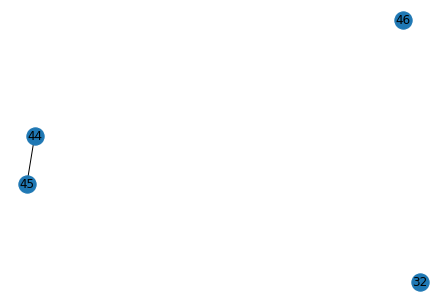

match_branches = [[32, 45]]
edges_to_delete (resolve crossover) = [[32, 44], [32, 46], [44, 45], [44, 46], [45, 46]]
edges_to_create (resolve crossover) = [[32, 45]]
edges_to_delete (cut_limb_network) = [array([32, 44]), array([32, 46]), array([44, 45]), array([44, 46]), array([45, 46])]
edges_to_create = [[32, 45]]
Number of connected components = 3
Comp 0 = {0, 33, 34, 1, 4, 37, 38, 32, 8, 9, 45, 49, 19, 53, 29, 31}
Comp 1 = {2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60}
Comp 2 = {46}
curr_limb_copy.deleted_edges = [[32, 44], [32, 45], [32, 46], [44, 46], [45, 46], [32, 44], [32, 45], [32, 46], [44, 46], [45, 46], array([32, 44]), array([32, 46]), array([44, 45]), array([44, 46]), array([45, 46])]
curr_limb_copy.created_edges = [[44, 45], [44, 45], [32, 45]]
After get best cut: cut_edges = [array([32, 44]), array([32, 46]), array([44, 45]), array([44, 46]), arr

  Edge: [33 34]: curr_angle = 25.66
  Edge: [34 37]: curr_angle = 33.34
  Edge: [37 45]: curr_angle = 35.01
  Edge: [45 44]: curr_angle = 40.96
  Edge: [44 47]: curr_angle = 34.5

Total time for doubling_back = 0.1427607536315918

Attempting the width jump check (attempting from both sides)
  Edge: [33 34]: jump = -16.18
  Edge: [34 37]: jump = -338.64
  Edge: [37 45]: jump = -180.28
  Edge: [45 44]: jump = -1040.28
  Edge: [44 47]: jump = -74.83
Total time for width = 0.09850835800170898
Path starting at 33 had err_edges: []
  Edge: [47 44]: jump = -380.46
  Edge: [44 45]: jump = 924.08
Adding error edge [44 45] because width jump was 924.0752796933002
  Edge: [45 37]: jump = 1098.95
Adding error edge [45 37] because width jump was 1098.9462677830843
  Edge: [37 34]: jump = 338.64
Adding error edge [37 34] because width jump was 338.6406658924909
  Edge: [34 33]: jump = 16.18
Total time for width = 0.09733271598815918
Path starting at 42 had err_edges: [[44, 45], [45, 37], [37, 34]]
f

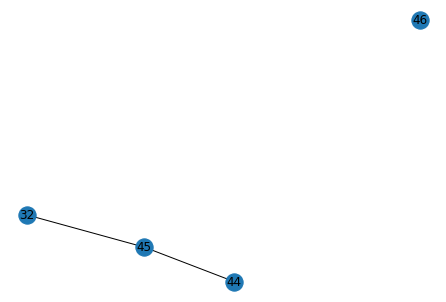

match_branches = [[32, 45]]
edges_to_delete (resolve crossover) = [[32, 44], [32, 46], [44, 45], [44, 46], [45, 46]]
edges_to_create (resolve crossover) = [[32, 45]]
edges_to_delete (cut_limb_network) = [array([32, 44]), array([32, 46]), array([44, 45]), array([44, 46]), array([45, 46])]
edges_to_create = [[32, 45]]
Number of connected components = 3
Comp 0 = {0, 33, 34, 1, 4, 37, 38, 32, 8, 9, 45, 49, 19, 53, 29, 31}
Comp 1 = {2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60}
Comp 2 = {46}
curr_limb_copy.deleted_edges = [[32, 44], [32, 45], [32, 46], [44, 46], [45, 46], [32, 44], [32, 45], [32, 46], [44, 46], [45, 46], array([32, 44]), array([32, 46]), array([44, 45]), array([44, 46]), array([45, 46]), array([32, 44]), array([32, 46]), array([44, 45]), array([44, 46]), array([45, 46])]
curr_limb_copy.created_edges = [[44, 45], [44, 45], [32, 45], [32, 45]]
After get

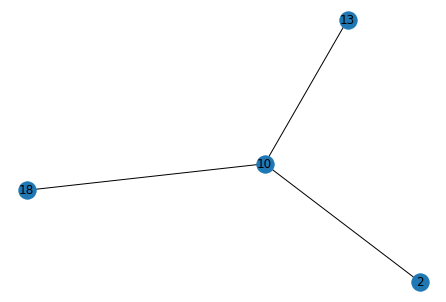

match_branches = [[13, 18]]
edges_to_delete (resolve crossover) = [[2, 10], [2, 13], [2, 18], [10, 13], [10, 18]]
edges_to_create (resolve crossover) = [[13, 18]]
curr_limb.deleted_edges 5 =[[32, 44], [32, 45], [32, 46], [44, 46], [45, 46], [32, 44], [32, 45], [32, 46], [44, 46], [45, 46], array([32, 44]), array([32, 46]), array([44, 45]), array([44, 46]), array([45, 46]), array([32, 44]), array([32, 46]), array([44, 45]), array([44, 46]), array([45, 46])]
Skipping endnode 50 because skeletal distance was 1034.7069085726532 and threshold was 2500
skip_nodes = [50]
edges_to_delete (cut_limb_network) = [[2, 10], [2, 13], [2, 18], [10, 13], [10, 18]]
edges_to_create = [[13, 18]]
Number of connected components = 5
Comp 0 = {0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 49, 52, 53, 57, 58, 59, 60}
Comp 1 = {46}
Comp 2 = {2}
Comp 3 = {6, 39, 13, 15, 48, 18, 51, 50, 54, 55, 56, 30}
Comp 4 = {

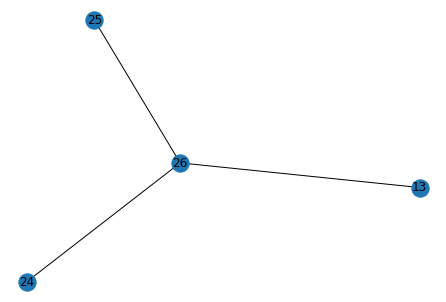

match_branches = [[13, 26], [24, 25]]
edges_to_delete (resolve crossover) = [[13, 24], [13, 25], [24, 26], [25, 26]]
edges_to_create (resolve crossover) = [[13, 26], [24, 25]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 31 because skeletal distance was 614.6656751437754 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[13, 24], [13, 25], [24, 26], [25, 26]]
edges_to_create = [[13, 26], [24, 25]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}
Comp 1 = {8, 9, 10, 13, 26, 27}
curr_limb_copy.deleted_edges = [[13, 24], [13, 25], [24, 26], [25, 26]]
curr_limb_copy.created_edges = [[13, 26], [24, 25]]
After get best cut: cut_edges = [[13, 24], [13, 25], [24, 26], [25, 26]], added_edges = [[13, 26], [24, 25]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at

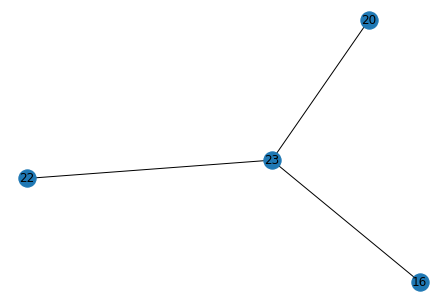

match_branches = [[20, 22], [16, 23]]
edges_to_delete (resolve crossover) = [[16, 20], [16, 22], [20, 23], [22, 23]]
edges_to_create (resolve crossover) = [[20, 22], [16, 23]]
curr_limb.deleted_edges 5 =[[13, 24], [13, 25], [24, 26], [25, 26]]
Skipping endnode 31 because skeletal distance was 614.6656751437754 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[16, 20], [16, 22], [20, 23], [22, 23]]
edges_to_create = [[20, 22], [16, 23]]
Number of connected components = 3
Comp 0 = {5, 7, 12, 14, 15, 16, 17, 18, 19, 23, 24, 25, 29, 30, 31, 32, 34, 35, 36, 37, 40, 41, 42, 44, 45}
Comp 1 = {0, 33, 2, 3, 4, 1, 38, 39, 6, 11, 43, 20, 21, 22, 28}
Comp 2 = {8, 9, 10, 13, 26, 27}
curr_limb_copy.deleted_edges = [[13, 24], [13, 25], [24, 26], [25, 26], [16, 20], [16, 22], [20, 23], [22, 23]]
curr_limb_copy.created_edges = [[13, 26], [24, 25], [20, 22], [16, 23]]
After get best cut: cut_edges = [[16, 20], [16, 22], [20, 23], [22, 23]], added_edges = [[20, 22], [16, 23]

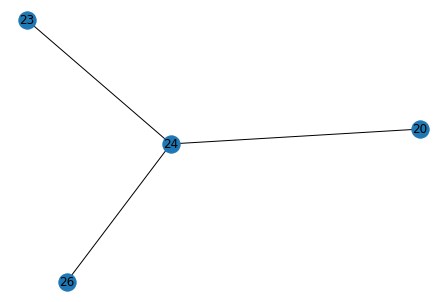

match_branches = [[20, 24]]
edges_to_delete (resolve crossover) = [[20, 23], [20, 26], [23, 24], [23, 26], [24, 26]]
edges_to_create (resolve crossover) = [[20, 24]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[20, 23], [20, 26], [23, 24], [23, 26], [24, 26]]
edges_to_create = [[20, 24]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 13, 14, 16, 18, 19, 20, 21, 23, 24}
Comp 1 = {33, 6, 10, 11, 12, 15, 17, 22, 26, 27, 28, 29, 30, 31}
Comp 2 = {25}
Comp 3 = {32}
curr_limb_copy.deleted_edges = [[20, 23], [20, 26], [23, 24], [23, 26], [24, 26]]
curr_limb_copy.created_edges = [[20, 24]]
After get best cut: cut_edges = [[20, 23], [20, 26], [23, 24], [23, 26], [24, 26]], added_edges = [[20, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so 

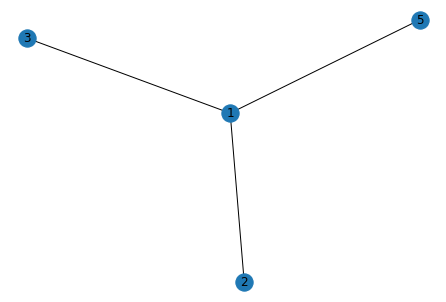

match_branches = [[1, 5]]
edges_to_delete (resolve crossover) = [[1, 2], [1, 3], [2, 3], [2, 5], [3, 5]]
edges_to_create (resolve crossover) = [[1, 5]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 1 because skeletal distance was 1239.3700773996104 and threshold was 2500
Skipping endnode 2 because skeletal distance was 1044.58233280101 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 2], [1, 3], [2, 3], [2, 5], [3, 5]]
edges_to_create = [[1, 5]]
Number of connected components = 4
Comp 0 = {1, 5}
Comp 1 = {2}
Comp 2 = {0, 3, 6, 7, 8, 9}
Comp 3 = {4}
curr_limb_copy.deleted_edges = [[1, 2], [1, 3], [2, 3], [2, 5], [3, 5]]
curr_limb_copy.created_edges = [[1, 5]]
After get best cut: cut_edges = [[1, 2], [1, 3], [2, 3], [2, 5], [3, 5]], added_edges = [[1, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL =

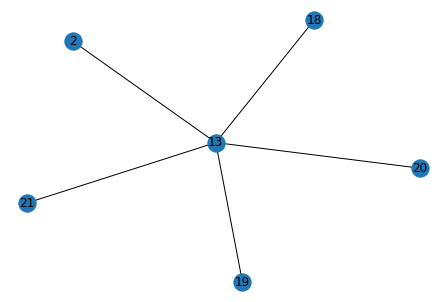

match_branches = [[13, 18]]
edges_to_delete (resolve crossover) = [[2, 13], [2, 18], [2, 19], [2, 20], [2, 21], [13, 19], [13, 20], [13, 21], [18, 19], [18, 20], [18, 21], [19, 20], [19, 21], [20, 21]]
edges_to_create (resolve crossover) = [[13, 18]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 13], [2, 18], [2, 19], [2, 20], [2, 21], [13, 19], [13, 20], [13, 21], [18, 19], [18, 20], [18, 21], [19, 20], [19, 21], [20, 21]]
edges_to_create = [[13, 18]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 11

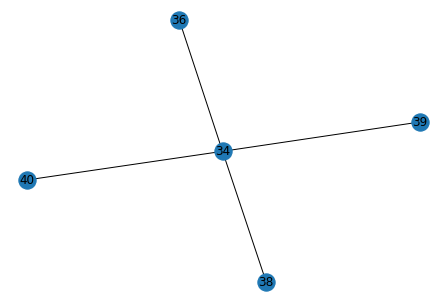

match_branches = [[34, 39], [36, 38]]
edges_to_delete (resolve crossover) = [[34, 36], [34, 38], [34, 40], [36, 39], [36, 40], [38, 39], [38, 40], [39, 40]]
edges_to_create (resolve crossover) = [[34, 39], [36, 38]]
curr_limb.deleted_edges 5 =[[2, 13], [2, 18], [2, 19], [2, 20], [2, 21], [13, 19], [13, 20], [13, 21], [18, 19], [18, 20], [18, 21], [19, 20], [19, 21], [20, 21]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[34, 36], [34, 38], [34, 40], [36, 39], [36, 40], [38, 39], [38, 40], [39, 40]]
edges_to_create = [[34, 39], [36, 38]]
Number of connected components = 6
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 32, 33, 36, 37, 38, 41, 42, 47, 48, 54, 55}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 22, 25, 26, 27, 28, 29, 30, 31, 34, 35, 39, 43, 44, 45, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,

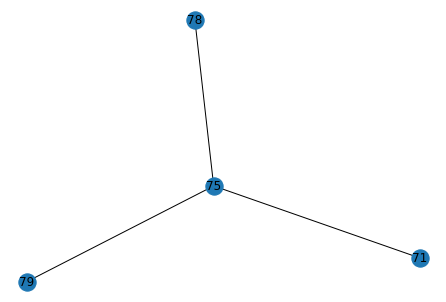

match_branches = [[71, 79], [75, 78]]
edges_to_delete (resolve crossover) = [[71, 75], [71, 78], [75, 79], [78, 79]]
edges_to_create (resolve crossover) = [[71, 79], [75, 78]]
curr_limb.deleted_edges 5 =[[2, 13], [2, 18], [2, 19], [2, 20], [2, 21], [13, 19], [13, 20], [13, 21], [18, 19], [18, 20], [18, 21], [19, 20], [19, 21], [20, 21], [34, 36], [34, 38], [34, 40], [36, 39], [36, 40], [38, 39], [38, 40], [39, 40]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[71, 75], [71, 78], [75, 79], [78, 79]]
edges_to_create = [[71, 79], [75, 78]]
Number of connected components = 9
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 32, 33, 36, 37, 38, 41, 42, 47, 48, 54, 55}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 22, 25, 26, 27, 28, 29, 30, 31, 34, 35, 39, 43, 44, 45, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 

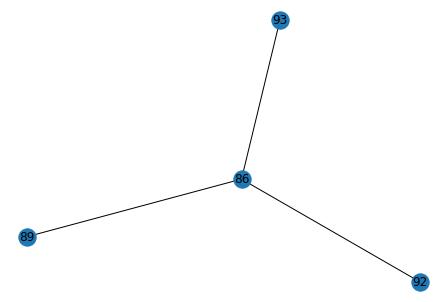

match_branches = [[86, 89]]
edges_to_delete (resolve crossover) = [[86, 92], [86, 93], [89, 92], [89, 93], [92, 93]]
edges_to_create (resolve crossover) = [[86, 89]]
curr_limb.deleted_edges 5 =[[2, 13], [2, 18], [2, 19], [2, 20], [2, 21], [13, 19], [13, 20], [13, 21], [18, 19], [18, 20], [18, 21], [19, 20], [19, 21], [20, 21], [34, 36], [34, 38], [34, 40], [36, 39], [36, 40], [38, 39], [38, 40], [39, 40], [71, 75], [71, 78], [75, 79], [78, 79]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[86, 92], [86, 93], [89, 92], [89, 93], [92, 93]]
edges_to_create = [[86, 89]]
Number of connected components = 11
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 32, 33, 36, 37, 38, 41, 42, 47, 48, 54, 55}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 22, 25, 26, 27, 28, 29, 30, 31, 34, 35, 39, 43, 44, 45, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 78, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 94, 95, 102, 103}
Co

  Edge: [30 28]: curr_angle = 27.16
  Edge: [28 25]: curr_angle = 1.64
  Edge: [25 26]: curr_angle = 21.19
  Edge: [26 27]: curr_angle = 27.34
  Edge: [27 35]: curr_angle = 51.82
  Edge: [35 45]: curr_angle = 16.38
  Edge: [45 50]: curr_angle = 26.81
  Edge: [50 61]: curr_angle = 33.11
  Edge: [61 65]: curr_angle = 25.25
  Edge: [65 68]: curr_angle = 13.3
  Edge: [68 69]: curr_angle = 26.89
  Edge: [69 73]: curr_angle = 21.34
  Edge: [73 75]: curr_angle = 11.26
  Edge: [75 78]: curr_angle = 19.31
  Edge: [78 80]: curr_angle = 16.85
  Edge: [80 83]: curr_angle = 2.88
  Edge: [83 86]: curr_angle = 21.21
  Edge: [86 89]: curr_angle = 26.75

Total time for doubling_back = 2.262871742248535

Attempting the width jump check (attempting from both sides)
  Edge: [30 28]: jump = -59.54
  Edge: [28 25]: jump = -113.97
  Edge: [25 26]: jump = -86.23
  Edge: [26 27]: jump = 37.62
  Edge: [27 35]: jump = -318.39
  Edge: [35 45]: jump = 121.94
  Edge: [45 50]: jump = 83.55
  Edge: [50 61]: jump = 41

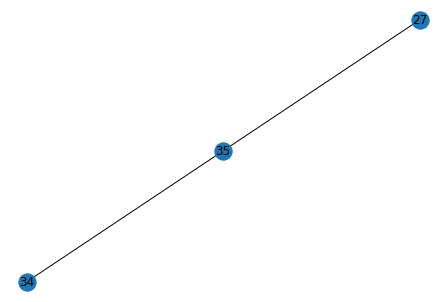

match_branches = []
edges_to_delete (resolve crossover) = [[27, 34], [27, 35], [34, 35]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([27, 34]), array([27, 35]), array([34, 35])]
edges_to_create = []
Number of connected components = 13
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 32, 33, 36, 37, 38, 41, 42, 47, 48, 54, 55}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 22, 25, 26, 27, 28, 29, 30, 31}
Comp 4 = {21}
Comp 5 = {34, 39}
Comp 6 = {35, 43, 44, 45, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 78, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 94, 95, 102, 103}
Comp 7 = {40}
Comp 8 = {64, 72, 79, 71}
Comp 9 = {92}
Comp 10 = {82, 93, 96, 97, 98, 99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116}
Comp 11 = {77}
Comp 12 = {91}
curr_limb_copy.deleted_edges = [[2, 13], [2, 18], [2, 19], [2, 20], [2, 21], [13, 19], [13, 20], [13, 21], [18, 19],

  Edge: [ 9 11]: curr_angle = 155.57

Total time for doubling_back = 0.16118526458740234
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 9 11] had a doubling back of 155.56615089709965
***inside resolve crossover!!!!****
coordinate_branches = [9, 10, 11]
9 = red
10 = aqua
11 = purple
Angle between 9 and 10 = 23.56 
Angle between 9 and 11 = 96.96 
Angle between 10 and 11 = 65.19 
Final Matches = [[9, 10]]
matched_branches_revised = [[9, 10]]
Original graph


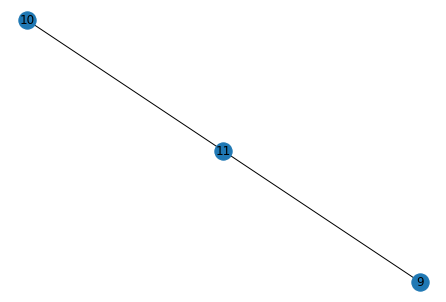

match_branches = [[9, 10]]
edges_to_delete (resolve crossover) = [[9, 11], [10, 11]]
edges_to_create (resolve crossover) = [[9, 10]]
edges_to_delete (cut_limb_network) = [array([ 9, 11]), array([10, 11])]
edges_to_create = [[9, 10]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 1 = {11}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11])]
curr_limb_copy.created_edges = [[9, 10]]
After get best cut: cut_edges = [array([ 9, 11]), array([10, 11])], added_edges = [[9, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid pa

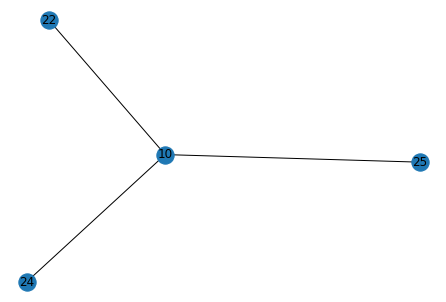

match_branches = [[10, 24]]
edges_to_delete (resolve crossover) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create (resolve crossover) = [[10, 24]]
curr_limb.deleted_edges 5 =[array([ 9, 11]), array([10, 11])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create = [[10, 24]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 17, 18, 19, 20, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 1 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 2 = {25}
Comp 3 = {11}
Comp 4 = {21}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
curr_limb_copy.created_edges = [[9, 10], [10, 24]]
After get best cut: cut_edges = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]], added_edges = [[10, 2

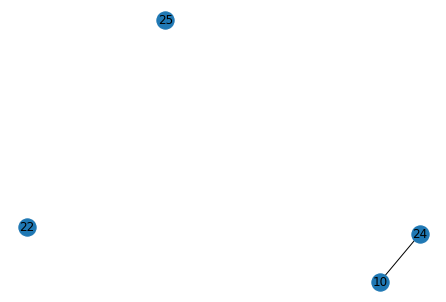

match_branches = [[10, 24]]
edges_to_delete (resolve crossover) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create (resolve crossover) = [[10, 24]]
curr_limb.deleted_edges 5 =[array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create = [[10, 24]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 17, 18, 19, 20, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 1 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 2 = {25}
Comp 3 = {11}
Comp 4 = {21}
Comp 5 = {47}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
curr_limb_copy.created_edges = [[9, 10], [10, 

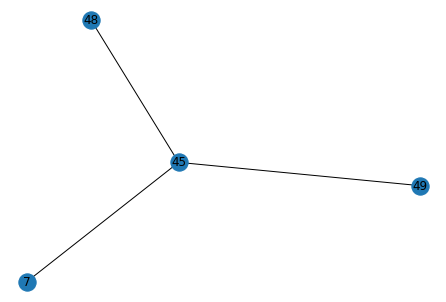

match_branches = [[45, 48]]
edges_to_delete (resolve crossover) = [[7, 45], [7, 48], [7, 49], [45, 49], [48, 49]]
edges_to_create (resolve crossover) = [[45, 48]]
curr_limb.deleted_edges 5 =[array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[7, 45], [7, 48], [7, 49], [45, 49], [48, 49]]
edges_to_create = [[45, 48]]
Number of connected components = 8
Comp 0 = {0, 1, 2, 3, 4, 6, 9, 10, 14, 15, 17, 20, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 48}
Comp 1 = {5, 7, 8, 18, 19, 26, 46, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 2 = {49}
Comp 3 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 4 = {25}
Comp 5 = {11}
Comp 6 = {21}
Comp 7 = {47}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [2

  Edge: [ 9 10]: curr_angle = 9.22
  Edge: [10 24]: curr_angle = 6.71
  Edge: [24 29]: curr_angle = 24.33
  Edge: [29 32]: curr_angle = 10.51
  Edge: [32 33]: curr_angle = 19.13
  Edge: [33 31]: curr_angle = 20.96
  Edge: [31 34]: curr_angle = 17.51
  Edge: [34 36]: curr_angle = 26.74
  Edge: [36 38]: curr_angle = 28.42
  Edge: [38 39]: curr_angle = 10.21
  Edge: [39 45]: curr_angle = 14.46
  Edge: [45 48]: curr_angle = 4.86

Total time for doubling_back = 0.6810970306396484

Attempting the width jump check (attempting from both sides)
  Edge: [ 9 10]: jump = -46.16
  Edge: [10 24]: jump = 38.08
  Edge: [24 29]: jump = 3.14
  Edge: [29 32]: jump = 5.55
  Edge: [32 33]: jump = 48.26
  Edge: [33 31]: jump = -163.86
  Edge: [31 34]: jump = 20.49
  Edge: [34 36]: jump = 123.04
  Edge: [36 38]: jump = -161.03
  Edge: [38 39]: jump = 107.43
  Edge: [39 45]: jump = 40.55
  Edge: [45 48]: jump = 307.1
Adding error edge [45 48] because width jump was 307.0950280670693
Total time for width = 0.6

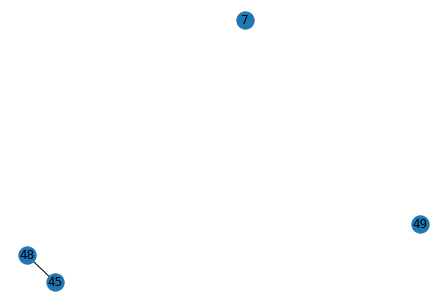

match_branches = [[45, 48]]
edges_to_delete (resolve crossover) = [[7, 45], [7, 48], [7, 49], [45, 49], [48, 49]]
edges_to_create (resolve crossover) = [[45, 48]]
Rejecting creating edge [45, 48] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 7, 45]), array([ 7, 48]), array([ 7, 49]), array([45, 48]), array([45, 49]), array([48, 49])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {48}
Comp 1 = {5, 7, 8, 18, 19, 26, 46, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 2 = {0, 1, 2, 3, 4, 6, 9, 10, 14, 15, 17, 20, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45}
Comp 3 = {49}
Comp 4 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 5 = {25}
Comp 6 = {11}
Comp 7 = {21}
Comp 8 = {47}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [7, 45], [7, 4

  Edge: [ 9 10]: curr_angle = 9.22
  Edge: [10 24]: curr_angle = 6.71
  Edge: [24 29]: curr_angle = 24.33
  Edge: [29 32]: curr_angle = 10.51
  Edge: [32 33]: curr_angle = 19.13
  Edge: [33 31]: curr_angle = 20.96
  Edge: [31 34]: curr_angle = 17.51
  Edge: [34 36]: curr_angle = 26.74
  Edge: [36 38]: curr_angle = 28.42
  Edge: [38 39]: curr_angle = 10.21
  Edge: [39 45]: curr_angle = 14.46
  Edge: [45 48]: curr_angle = 4.86

Total time for doubling_back = 1.1610784530639648

Attempting the width jump check (attempting from both sides)
  Edge: [ 9 10]: jump = -46.16
  Edge: [10 24]: jump = 38.08
  Edge: [24 29]: jump = 3.14
  Edge: [29 32]: jump = 5.55
  Edge: [32 33]: jump = 48.26
  Edge: [33 31]: jump = -163.86
  Edge: [31 34]: jump = 20.49
  Edge: [34 36]: jump = 123.04
  Edge: [36 38]: jump = -161.03
  Edge: [38 39]: jump = 107.43
  Edge: [39 45]: jump = 40.55
  Edge: [45 48]: jump = 307.1
Adding error edge [45 48] because width jump was 307.0950280670693
Total time for width = 0.8

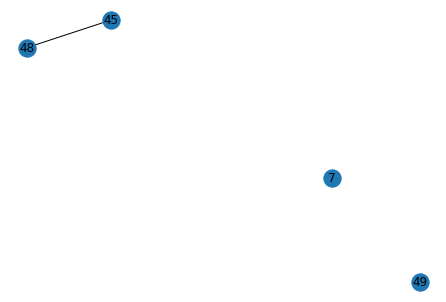

match_branches = [[45, 48]]
edges_to_delete (resolve crossover) = [[7, 45], [7, 48], [7, 49], [45, 49], [48, 49]]
edges_to_create (resolve crossover) = [[45, 48]]
Rejecting creating edge [45, 48] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 7, 45]), array([ 7, 48]), array([ 7, 49]), array([45, 48]), array([45, 49]), array([48, 49])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {48}
Comp 1 = {5, 7, 8, 18, 19, 26, 46, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 2 = {0, 1, 2, 3, 4, 6, 9, 10, 14, 15, 17, 20, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45}
Comp 3 = {49}
Comp 4 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 5 = {25}
Comp 6 = {11}
Comp 7 = {21}
Comp 8 = {47}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [7, 45], [7, 4

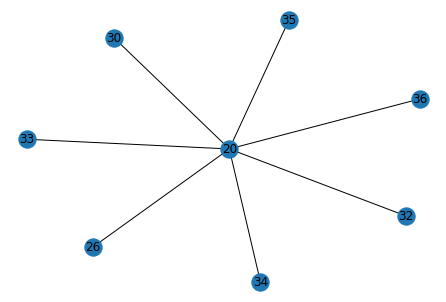

match_branches = []
edges_to_delete (resolve crossover) = [[20, 26], [20, 30], [20, 32], [20, 33], [20, 34], [20, 35], [20, 36], [26, 30], [26, 32], [26, 33], [26, 34], [26, 35], [26, 36], [30, 32], [30, 33], [30, 34], [30, 35], [30, 36], [32, 33], [32, 34], [32, 35], [32, 36], [33, 34], [33, 35], [33, 36], [34, 35], [34, 36], [35, 36]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[20, 26], [20, 30], [20, 32], [20, 33], [20, 34], [20, 35], [20, 36], [26, 30], [26, 32], [26, 33], [26, 34], [26, 35], [26, 36], [30, 32], [30, 33], [30, 34], [30, 35], [30, 36], [32, 33], [32, 34], [32, 35], [32, 36], [33, 34], [33, 35], [33, 36], [34, 35], [34, 36], [35, 36]]
edges_to_create = []
Number of connected components = 7
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29}
Comp 1 = {26}
Comp 2 = {30}
Comp 3 = {32, 33, 37, 38, 39.0, 40, 41, 74, 75, 76, 25, 31}
Com

  Edge: [7 8]: curr_angle = 28.01
  Edge: [ 8 10]: curr_angle = 39.21
  Edge: [10 13]: curr_angle = 28.25
  Edge: [13 15]: curr_angle = 28.42
  Edge: [15 21]: curr_angle = 15.15
  Edge: [21 22]: curr_angle = 17.99
  Edge: [22 24]: curr_angle = 21.76
  Edge: [24 26]: curr_angle = 15.11
  Edge: [26 29]: curr_angle = 21.36
  Edge: [29 31]: curr_angle = 32.83
  Edge: [31 45]: curr_angle = 52.45
  Edge: [45 47]: curr_angle = 24.26
  Edge: [47 41]: curr_angle = 16.31
  Edge: [41 42]: curr_angle = 17.95
  Edge: [42 43]: curr_angle = 22.42
  Edge: [43 46]: curr_angle = 7.54

Total time for doubling_back = 3.45027494430542

Attempting the width jump check (attempting from both sides)
  Edge: [7 8]: jump = -224.5
  Edge: [ 8 10]: jump = 59.08
  Edge: [10 13]: jump = -385.9
  Edge: [13 15]: jump = -5.62
  Edge: [15 21]: jump = -19.76
  Edge: [21 22]: jump = -59.54
  Edge: [22 24]: jump = -168.82
  Edge: [24 26]: jump = -86.81
  Edge: [26 29]: jump = 217.81
Adding error edge [26 29] because width 

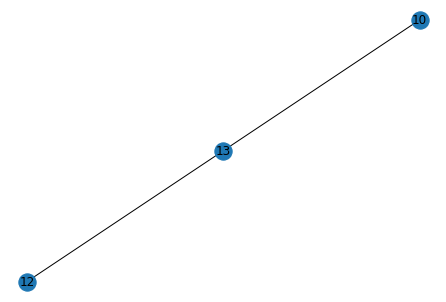

match_branches = [[10, 13]]
edges_to_delete (resolve crossover) = [[10, 12], [12, 13]]
edges_to_create (resolve crossover) = [[10, 13]]
Rejecting creating edge [10, 13] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([10, 12]), array([10, 13]), array([12, 13])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Comp 2 = {12}
curr_limb_copy.deleted_edges = [array([10, 12]), array([10, 13]), array([12, 13])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([10, 12]), array([10, 13]), array([12, 13])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the en

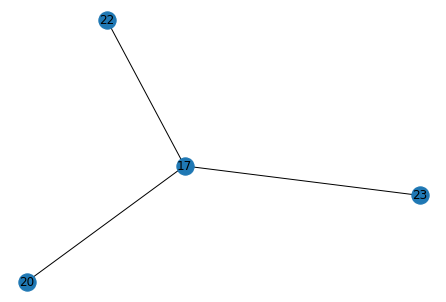

match_branches = [[17, 23], [20, 22]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 22], [20, 23], [22, 23]]
edges_to_create (resolve crossover) = [[17, 23], [20, 22]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[17, 20], [17, 22], [20, 23], [22, 23]]
edges_to_create = [[17, 23], [20, 22]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 23}
Comp 1 = {11, 20, 21, 22}
curr_limb_copy.deleted_edges = [[17, 20], [17, 22], [20, 23], [22, 23]]
curr_limb_copy.created_edges = [[17, 23], [20, 22]]
After get best cut: cut_edges = [[17, 20], [17, 22], [20, 23], [22, 23]], added_edges = [[17, 23], [20, 22]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of gr

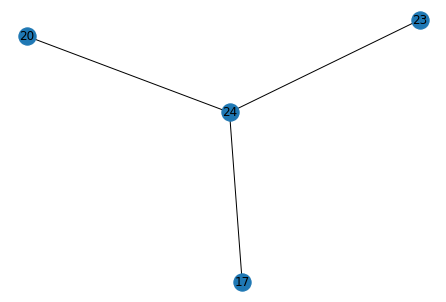

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 12 because skeletal distance was 1187.1655479983135 and threshold was 2500
skip_nodes = [12]
edges_to_delete (cut_limb_network) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create = [[23, 24]]
Number of connected components = 3
Comp 0 = {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
curr_limb_copy.created_edges = [[23, 24]]
After get best cut: cut_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]], added_edges = [[23, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 

  Edge: [14 19]: curr_angle = 20.97
  Edge: [19 24]: curr_angle = 34.72
  Edge: [24 23]: curr_angle = 13.67
  Edge: [23 21]: curr_angle = 26.48
  Edge: [21 29]: curr_angle = 32.81
  Edge: [29 30]: curr_angle = 19.77
  Edge: [30 32]: curr_angle = 38.72

Total time for doubling_back = 1.0964064598083496

Attempting the width jump check (attempting from both sides)
  Edge: [14 19]: jump = -131.71
  Edge: [19 24]: jump = 17.77
  Edge: [24 23]: jump = 232.92
Adding error edge [24 23] because width jump was 232.9240325917778
  Edge: [23 21]: jump = -7.15
  Edge: [21 29]: jump = -23.37
  Edge: [29 30]: jump = 150.26
  Edge: [30 32]: jump = -4.94
Total time for width = 0.9426512718200684
Path starting at 12 had err_edges: [[24, 23]]
  Edge: [32 30]: jump = 4.94
  Edge: [30 29]: jump = -100.38
  Edge: [29 21]: jump = 1.02
  Edge: [21 23]: jump = 7.15
  Edge: [23 24]: jump = -232.92
  Edge: [24 19]: jump = -17.77
  Edge: [19 14]: jump = 62.67
Total time for width = 0.7771029472351074
Path starti

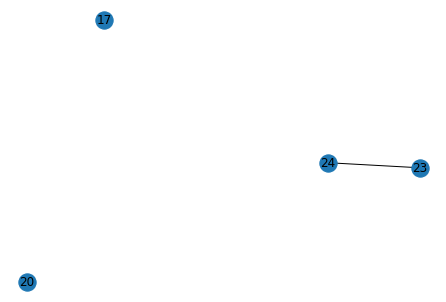

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
Rejecting creating edge [23, 24] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {32, 33, 34, 4, 5, 8, 9, 10, 21, 22, 23, 28, 29, 30, 31}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
Comp 3 = {2, 3, 6, 7, 11, 12, 13, 14, 18, 19, 24, 25, 26, 27}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
curr_limb_copy.created_edges = [[23, 24]]
After get best cut: cut_edges = [array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])], added_edges = []


  Edge: [14 19]: curr_angle = 20.97
  Edge: [19 24]: curr_angle = 34.72
  Edge: [24 23]: curr_angle = 13.67
  Edge: [23 21]: curr_angle = 26.48
  Edge: [21 29]: curr_angle = 32.81
  Edge: [29 30]: curr_angle = 19.77
  Edge: [30 32]: curr_angle = 38.72

Total time for doubling_back = 2.1043429374694824

Attempting the width jump check (attempting from both sides)
  Edge: [14 19]: jump = -131.71
  Edge: [19 24]: jump = 17.77
  Edge: [24 23]: jump = 232.92
Adding error edge [24 23] because width jump was 232.9240325917778
  Edge: [23 21]: jump = -7.15
  Edge: [21 29]: jump = -23.37
  Edge: [29 30]: jump = 150.26
  Edge: [30 32]: jump = -4.94
Total time for width = 2.518303632736206
Path starting at 12 had err_edges: [[24, 23]]
  Edge: [32 30]: jump = 4.94
  Edge: [30 29]: jump = -100.38
  Edge: [29 21]: jump = 1.02
  Edge: [21 23]: jump = 7.15
  Edge: [23 24]: jump = -232.92
  Edge: [24 19]: jump = -17.77
  Edge: [19 14]: jump = 62.67
Total time for width = 1.6595911979675293
Path startin

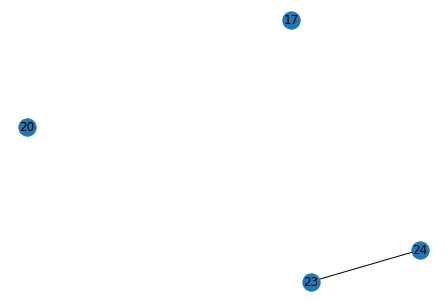

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
Rejecting creating edge [23, 24] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {32, 33, 34, 4, 5, 8, 9, 10, 21, 22, 23, 28, 29, 30, 31}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
Comp 3 = {2, 3, 6, 7, 11, 12, 13, 14, 18, 19, 24, 25, 26, 27}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
curr_limb_copy.created_edges = [[23, 24]]
After get best cut: cut_edges = [array([17, 20]), a

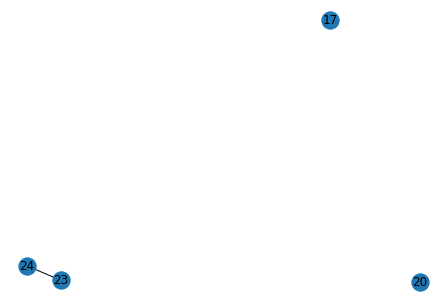

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
curr_limb.deleted_edges 5 =[[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
Skipping endnode 12 because skeletal distance was 1187.1655479983135 and threshold was 2500
skip_nodes = [12]
edges_to_delete (cut_limb_network) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create = [[23, 24]]
Number of connected components = 3
Comp 0 = {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]

  Edge: [14 19]: curr_angle = 20.97
  Edge: [19 24]: curr_angle = 34.72
  Edge: [24 23]: curr_angle = 13.67
  Edge: [23 21]: curr_angle = 26.48
  Edge: [21 29]: curr_angle = 32.81
  Edge: [29  8]: curr_angle = 105.97
  Edge: [8 9]: curr_angle = 144.99
  Edge: [ 9 10]: curr_angle = 144.11
  Edge: [10 34]: curr_angle = 15.62

Total time for doubling_back = 1.4929218292236328
There were 3 edges that passed doubling back threshold of 100
Winning edge [8 9] had a doubling back of 144.99444094387363
***inside resolve crossover!!!!****
coordinate_branches = [4, 8, 9]
4 = red
8 = aqua
9 = purple
Angle between 4 and 8 = 35.53 
Angle between 4 and 9 = 58.39 
Angle between 8 and 9 = 156.84 
Final Matches = []
matched_branches_revised = []
Original graph


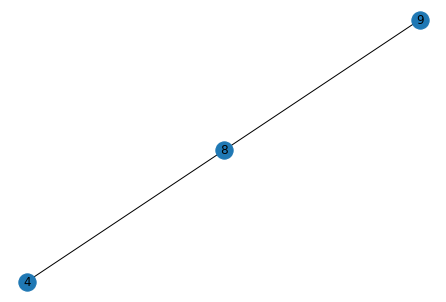

match_branches = []
edges_to_delete (resolve crossover) = [[4, 8], [4, 9], [8, 9]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([4, 8]), array([4, 9]), array([8, 9])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {33, 34, 5, 9, 10}
Comp 1 = {4}
Comp 2 = {2, 3, 6, 7, 8, 11, 12, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}
Comp 3 = {0, 1, 15, 16, 17}
Comp 4 = {20}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), [17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([4, 8]), array([4, 9]), array([8, 9])]
curr_limb_copy.created_edges = [[23, 24], [23, 24]]
After get best cut: cut_edges = [array([4, 8]), array([4, 9]), array([8, 9])], added_edges = []
total_soma_paths_to_cut = [[

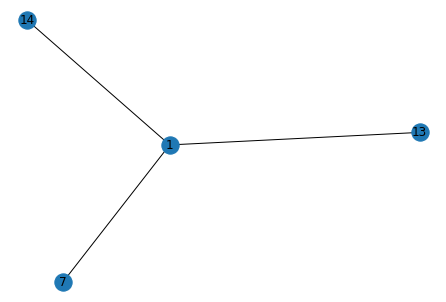

match_branches = [[7, 14]]
edges_to_delete (resolve crossover) = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]]
edges_to_create (resolve crossover) = [[7, 14]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]]
edges_to_create = [[7, 14]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 8, 9}
Comp 1 = {3, 4, 5, 6, 7, 14}
Comp 2 = {10, 11, 12, 13, 15, 16, 17, 18}
curr_limb_copy.deleted_edges = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]]
curr_limb_copy.created_edges = [[7, 14]]
After get best cut: cut_edges = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]], added_edges = [[7, 14]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([0, 

  Edge: [0 1]: curr_angle = 26.45

Total time for doubling_back = 0.23232316970825195

Attempting the width jump check (attempting from both sides)
  Edge: [0 1]: jump = 67.15
Total time for width = 0.20739316940307617
Path starting at 0 had err_edges: []
  Edge: [1 0]: jump = -67.15
Total time for width = 0.20598363876342773
Path starting at 1 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135699307810 = 184.767648935318 ------
Populate Done
Total time for NeuronSplitSuggestions populate = 1745.2510559558868


In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")